<a href="https://colab.research.google.com/github/ArindamS22/Riding-request-Prediction-for-Rapido/blob/master/rapido_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Created on 2Apr,2020
#@author: Arindam Sarkar,IIT BOMBAY (+91-7797703756)

'''As the size of csv file is not small.So I opt to use google cloud provided service google colab
   to get the distributed and fast computing for different operations and training of model using the GPU runtime'''!

In [0]:
#importing all the required libraries
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.cluster import KMeans
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import math
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from tensorflow.python.keras.callbacks import EarlyStopping


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive 
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#speciality of reading the dataframe in colab is that it is quite fast becasue of GPU backend
df=pd.read_csv(r'/content/drive/My Drive/ct_rr.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#Exploratory data analysis of riding history from the dataframe

In [0]:
df.head()
'''here we may see that we have four possible features like pick_lat,pick_lng etc'''

,ts,number,pick_lat,pick_lng,drop_lat,drop_lng
0,2018-04-07 07:07:17,14626,12.313621,76.658195,12.287301,76.602280
1,2018-04-07 07:32:27,85490,12.943947,77.560745,12.954014,77.543770
2,2018-04-07 07:36:44,05408,12.899603,77.587300,12.934780,77.569950
3,2018-04-07 07:38:00,58940,12.918229,77.607544,12.968971,77.636375
4,2018-04-07 07:39:29,05408,12.899490,77.587270,12.934780,77.569950


In [0]:
df['ts']=pd.to_datetime(df['ts']) #converting the datetime from string to date-time format
df['dates'] = pd.to_datetime(df['ts']).dt.date #extracting the date component from date time
df['time']= pd.to_datetime(df['ts']).dt.time  #extracting the time component from datetime
df.drop('ts',inplace=True,axis=1)#dropping datetime column
df=df[['dates','time','number','pick_lat','pick_lng','drop_lat','drop_lng']] #rearranging the columns in proper order

Before diving into the main problem.First let us extract the different location of riding request using unsupervised learning(clustering)using latitude and longitude of the pickup.**Now from business point of view which will give the insights of how much customer demand(in terms of riderequest) is happening in different locations**.

##Making a  WebMap by using the given pickup latitude,longitutde of the riding history.This is good way for visualising different location.

In [0]:
#creating a base map on broswer
c1=df['pick_lat'].mean() 
c2=df['pick_lng'].mean()
pick_lat=list(df['pick_lat'])
pick_lng=list(df['pick_lng'])
pick_lat=list(df['pick_lat'])
pick_lng=list(df['pick_lng'])

In [0]:
#Creating the Webmap using the python library folium
#This map has marks and popups as'Riding Request'
map=folium.Map(location=[c1,c2],zoom_start=6,tiles="Stamen Terrain")
fg=folium.FeatureGroup(name="Riding History Map")
for lat,lan in zip(pick_lat[:10000],pick_lng[:10000]):
  fg.add_child(folium.Marker(location=[lat,lan],popup='Pick Location',icon=folium.Icon(color='green')))
map.add_child(fg)
map.save("PickHistory.html")


[link text](https://)file:///C:/Users/Arindam1/Downloads/PickHistory.html
##I have given the link of the webmap which created using the riding history data.key point to notice here is that we have seen 4 major cities where the request was put.But we we verify that using k-mean clustering

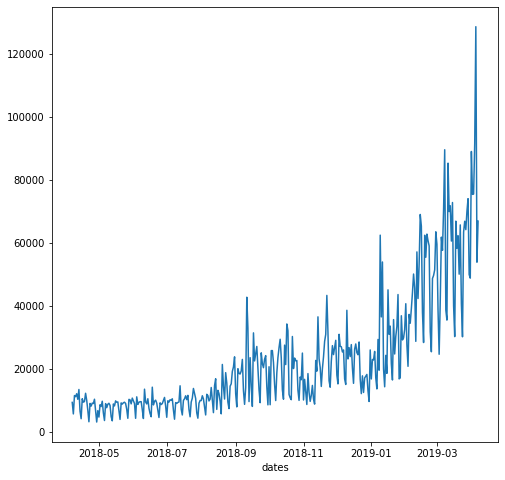

In [0]:
#making a basic visualisation to see number of ride request per day for last one year
df_datewise_count=df.groupby('dates').count()
plt.figure(figsize=(8,8))
df_datewise_count['number'].plot()

#Starting the work of unsupervised Learning(Clustering)

In [0]:
df_cluster=df[['pick_lat','pick_lng']]#making a new dataframe for clustering ride request location
kmeans = KMeans(n_clusters=4)#4 cluster chosen beacuse of the idea we got from the map,as there are 4 cities
kmeans.fit(df_cluster)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
kmeans.cluster_centers_#from this centers we will visualize the center of the k_means.

array([[12.93149736, 77.60711764],
       [27.62389826, 76.94003191],
       [22.31176284, 86.82696515],
       [17.34595992, 79.25327925]])

These below 4 links shows in google map what are positions
center1-->Bangalore,
center2-->Rajasthan,
center3-->Telangana,
center4-->Jharkhand,

[link text](https://)https://www.google.com/maps/place/12%C2%B055'53.4%22N+77%C2%B036'25.6%22E/@12.9315026,77.6049289,17z/data=!3m1!4b1!4m5!3m4!1s0x0:0x0!8m2!3d12.9314974!4d77.6071176
[link text](https://)https://www.google.com/maps/place/27%C2%B037'26.0%22N+76%C2%B056'24.1%22E/@27.623903,76.9378432,17z/data=!3m1!4b1!4m5!3m4!1s0x0:0x0!8m2!3d27.6238983!4d76.9400319
[link text](https://)https://www.google.com/maps/place/17%C2%B020'45.5%22N+79%C2%B015'11.8%22E/@17.345965,79.2510905,17z/data=!3m1!4b1!4m5!3m4!1s0x0:0x0!8m2!3d17.3459599!4d79.2532792
[link text](https://)https://www.google.com/maps/place/22%C2%B018'42.4%22N+86%C2%B049'37.1%22E/@22.3117677,86.8247765,17z/data=!3m1!4b1!4m5!3m4!1s0x0:0x0!8m2!3d22.3117628!4d86.8269652


In [0]:
df['cluster']=pd.DataFrame(kmeans.labels_)#making new column of riding request for different cities

In [0]:
df2=df.drop(['time','pick_lat','pick_lng','drop_lat','drop_lng'],axis=1)

In [0]:
##making different dataframe according to the calculated clusters
df2_c1=df2[df2['cluster']==0]
df2_c2=df2[df2['cluster']==1]
df2_c3=df2[df2['cluster']==2]
df2_c4=df2[df2['cluster']==3]
df2_c1.drop('cluster',axis=1,inplace=True)
df2_c2.drop('cluster',axis=1,inplace=True)
df2_c3.drop('cluster',axis=1,inplace=True)
df2_c4.drop('cluster',axis=1,inplace=True)
df2_c1['dates']=pd.to_datetime(df2_c1['dates'])
df2_c2['dates']=pd.to_datetime(df2_c2['dates'])
df2_c3['dates']=pd.to_datetime(df2_c3['dates'])
df2_c4['dates']=pd.to_datetime(df2_c4['dates'])

##now we are making the the dataframe on the number of rides on the daily basis for each locations
df2_c1=df2_c1.groupby('dates').count()
df2_c2=df2_c2.groupby('dates').count()
df2_c3=df2_c3.groupby('dates').count()
df2_c4=df2_c4.groupby('dates').count()


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

# Prediction of ride request for Location1 which is Bangalore using Deep Learning model LSTM

In [0]:
df2_c1.head() #now we have aggregated the the number of rides on daily basis.And the ''number'' corresponds that 

,number
dates,
2018-04-07,9357
2018-04-08,5712
2018-04-09,11504
2018-04-10,11120
2018-04-11,12084


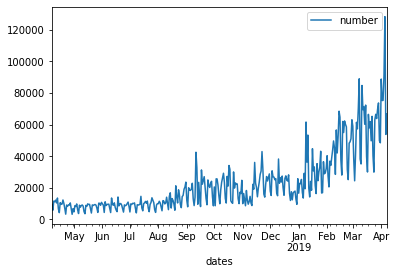

In [0]:
df2_c1.plot() #plotting the number of rides on daily basis
'''now in this plot we can see the variability or the fluctuation around yaxis is very high and  
a lot of outliers is present.But for the timing we will just consider the normal model'''

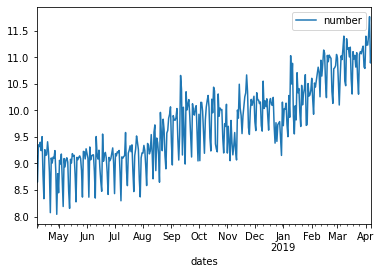

In [0]:
np.log(df2_c1).plot() ##taking log of the "number" column reduce the fluctuation in y_axis

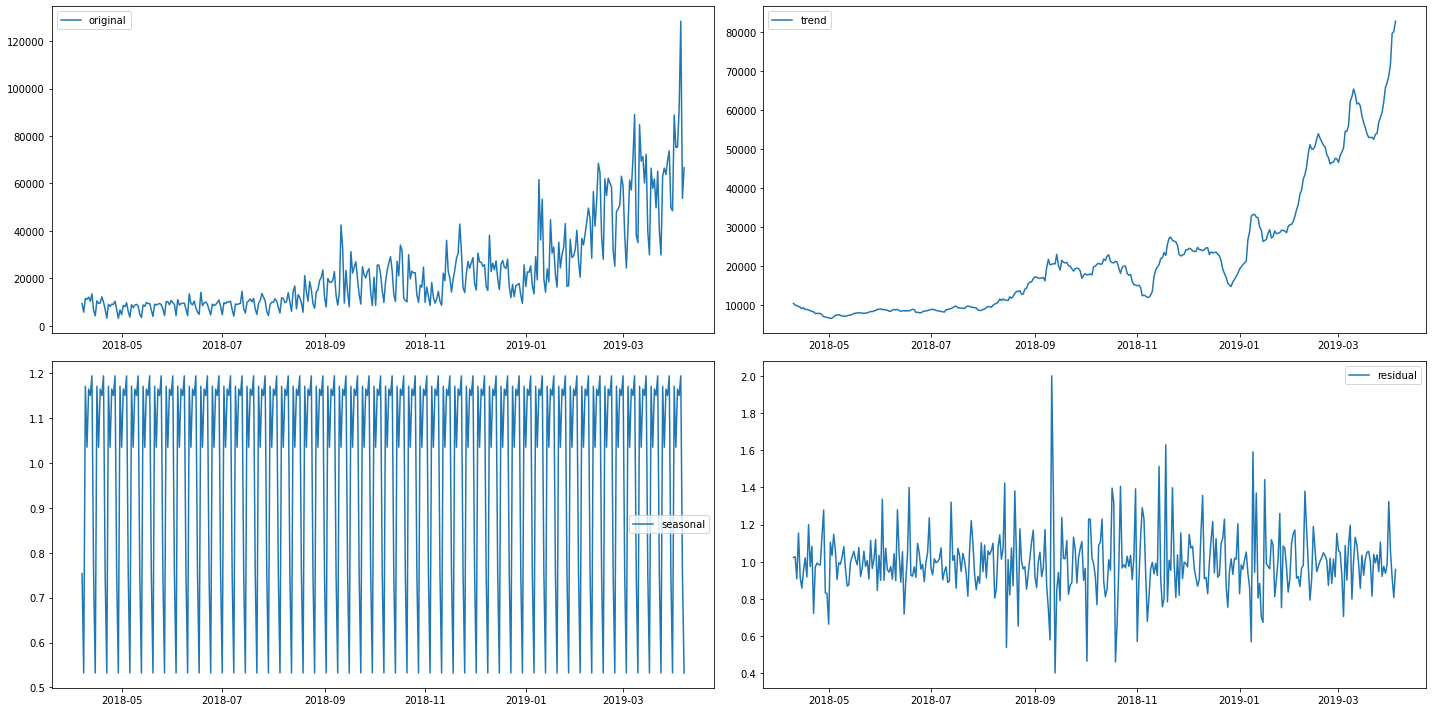

In [0]:
'''now we will decompose the model will see how the trend,seasonality and residual behaves'''
decompose=seasonal_decompose(df2_c1,model='multiplicative')
plt.figure(figsize=(20,10))
trend=decompose.trend
seasonal=decompose.seasonal
residual=decompose.resid

plt.subplot(221)
plt.plot(df2_c1,label='original')
plt.legend(loc='best')

plt.subplot(222)
plt.plot(trend,label='trend')
plt.legend(loc='best')

plt.subplot(223)
plt.plot(seasonal,label='seasonal')
plt.legend(loc='best')

plt.subplot(224)
plt.plot(residual,label='residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

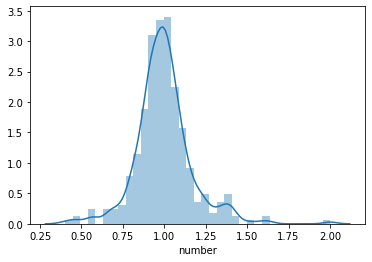

In [0]:
sns.distplot(residual['number'])
'''plotting the distribution of error confirms it almost looks like normal which is a good indication
that the time series can be turn into a stationary time series after removing trend,seasonality'''

In [0]:
result = adfuller(df2_c1['number'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

'''to confirm wheather the time series is stationary or not initially.as the p value is very high,i.e.means 
the time series is nonstaionary'''

ADF Statistic: 2.202965
p-value: 0.998885
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [0]:
'''feature engineering is done of the given dataframe inorder make them tensors to fit into the
tensorflow LSTM model'''
dataset = df2_c1.loc[:,'number'].values 
dataset = np.array(dataset).reshape(-1,1)
#dataset=np.log(dataset)
dataset = dataset.astype('float32')
print(dataset[0,0])
dataset = np.reshape(dataset, (-1, 1))
#scaling the datapoints between (0,1) values
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
#splitting the dataset into train and test data in 3:1 ratio
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

##function to convert train and test data  into tensors
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 30 ##ie means we will look on the previous 30 days requestofrides number inorder to predict the next one
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

9357.0


In [0]:
#here we are using standard tensorflow.keras libarary inorder to do the prediction
model = Sequential()
model.add(LSTM(30,return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2)) ##to prevent overfitting
model.add(LSTM(20))
model.add(Dropout(0.2)) ##to prevent overrfitting
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
'''as we are predicting continous variable the loss function is set as MSE and optimizer is adam which the combination
of gradient descent with momentum and rmsprop'''

history = model.fit(X_train, Y_train, epochs=300, batch_size=32, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=True)
'''this architecture of the model after seeing the below diagram of epochs vs train,test loss'''
model.summary()

'''training time of the model is pretty fast due to the use of GPU '''

Epoch 1/300
8/8 [==============================] - 1s 84ms/step - loss: 0.0092 - val_loss: 0.1314
Epoch 2/300
8/8 [==============================] - 0s 8ms/step - loss: 0.0049 - val_loss: 0.0804
Epoch 3/300
8/8 [==============================] - 0s 7ms/step - loss: 0.0031 - val_loss: 0.0482
Epoch 4/300
8/8 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0425
Epoch 5/300
8/8 [==============================] - 0s 8ms/step - loss: 0.0027 - val_loss: 0.0530
Epoch 6/300
8/8 [==============================] - 0s 8ms/step - loss: 0.0029 - val_loss: 0.0556
Epoch 7/300
8/8 [==============================] - 0s 7ms/step - loss: 0.0027 - val_loss: 0.0504
Epoch 8/300
8/8 [==============================] - 0s 7ms/step - loss: 0.0027 - val_loss: 0.0422
Epoch 9/300
8/8 [==============================] - 0s 7ms/step - loss: 0.0028 - val_loss: 0.0383
Epoch 10/300
8/8 [==============================] - 0s 7ms/step - loss: 0.0025 - val_loss: 0.0351
Epoch 11/300
8/8 [==========

In [0]:
##predicting the estimated train and test value and return them in their original scale
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
#train_predict=originalvalue(train_predict)
Y_train = scaler.inverse_transform([Y_train])
#Y_train=originalvalue(Y_train)
test_predict = scaler.inverse_transform(test_predict)
#test_predict=originalvalue(test_predict)
Y_test = scaler.inverse_transform([Y_test])
#Y_test=originalvalue(Y_test)
#wmape=np.mean(np.abs((Y_test[0] -test_predict[:,0] ) /Y_test[0] )) * 100
wmape=(sum(np.abs(test_predict[:,0] - Y_test[0]))/sum(Y_test[0]))*100
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))
print(f'Forecasting Accuracy:{100-wmape}')

'''we are kind of getting 84% accruacy without removing the outliers which is not bad.But if we remove the outlier 
we may get an better state of art'''

Train Mean Absolute Error: 2781.0635330600444
Train Root Mean Squared Error: 4040.917903119378
Test Mean Absolute Error: 9333.140068865585
Test Root Mean Squared Error: 11722.96396251791
Forecasting Accuracy:83.33474654914343


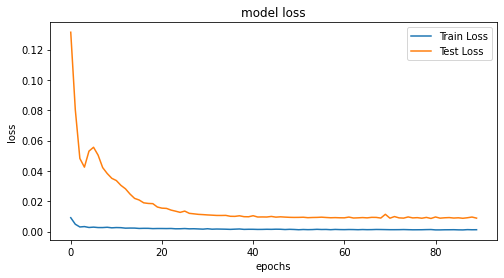

In [0]:
#now we want to see how the train error and test error behaves as the epochs get increased
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();
#from the plot we may see that the train and the test loss seems to converge.



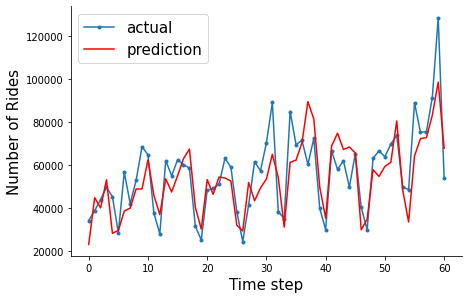

In [0]:
#here we will plot the actual vs the predicted done through model
aa=[x for x in range(61)]
plt.plot(aa, Y_test[0][:61], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:61], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Number of Rides', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

# Prediction of number of ride requests for location2 which is Rajasthan

We will follow the same steps we have done previously

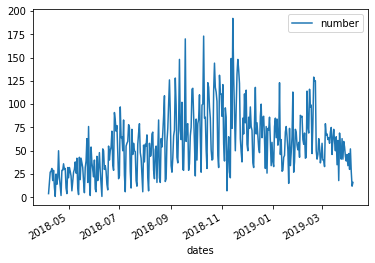

In [0]:
#plotting the number of rides for location 2 for the past given data
df2_c2.plot()
'''from the plot it is also evident that there are lots of outliers present in the location too'''

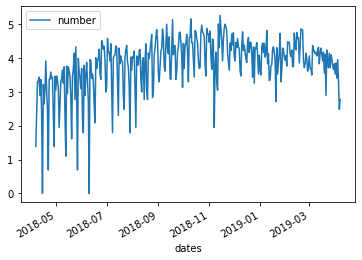

In [0]:
np.log(df2_c2).plot()

In [0]:
#feature engineering to make the dataframe into tensors in order fit in the lstm model
dataset = df2_c2.loc[:,'number'].values 
dataset = np.array(dataset).reshape(-1,1)
dataset=np.log(dataset)
dataset = dataset.astype('float32')
print(dataset[0,0])
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 30
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

1.3862944


In [0]:
#training the model///the previous logics are applicable for this model also.I dont want to repeat the comments'''
model = Sequential()
model.add(LSTM(30,return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(20))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=500, batch_size=32, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=True)

model.summary()

Epoch 1/500
8/8 [==============================] - 1s 80ms/step - loss: 0.4895 - val_loss: 0.4117
Epoch 2/500
8/8 [==============================] - 0s 7ms/step - loss: 0.3514 - val_loss: 0.2650
Epoch 3/500
8/8 [==============================] - 0s 7ms/step - loss: 0.2152 - val_loss: 0.1197
Epoch 4/500
8/8 [==============================] - 0s 7ms/step - loss: 0.0931 - val_loss: 0.0200
Epoch 5/500
8/8 [==============================] - 0s 7ms/step - loss: 0.0400 - val_loss: 0.0129
Epoch 6/500
8/8 [==============================] - 0s 7ms/step - loss: 0.0476 - val_loss: 0.0169
Epoch 7/500
8/8 [==============================] - 0s 7ms/step - loss: 0.0339 - val_loss: 0.0068
Epoch 8/500
8/8 [==============================] - 0s 7ms/step - loss: 0.0334 - val_loss: 0.0070
Epoch 9/500
8/8 [==============================] - 0s 7ms/step - loss: 0.0346 - val_loss: 0.0068
Epoch 10/500
8/8 [==============================] - 0s 7ms/step - loss: 0.0334 - val_loss: 0.0065
Epoch 11/500
8/8 [==========

In [0]:
#predicting the train and test set and rescale them
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
train_predict=originalvalue(train_predict)
Y_train = scaler.inverse_transform([Y_train])
Y_train=originalvalue(Y_train)
test_predict = scaler.inverse_transform(test_predict)
test_predict=originalvalue(test_predict)
Y_test = scaler.inverse_transform([Y_test])
Y_test=originalvalue(Y_test)
#wmape=np.mean(np.abs((Y_test[0] -test_predict[:,0] ) /Y_test[0] )) * 100
wmape=(sum(np.abs(test_predict[:,0] - Y_test[0]))/sum(Y_test[0]))*100
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))
print(f'Forecasting Accuracy:{100-wmape}')

Train Mean Absolute Error: 23.42069743644319
Train Root Mean Squared Error: 31.01657575919858
Test Mean Absolute Error: 17.562364066041532
Test Root Mean Squared Error: 24.53970124070721
Forecasting Accuracy:70.56587019235894


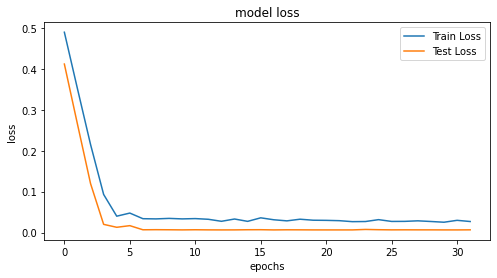

In [0]:
#plotting train loss vs test loss
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();



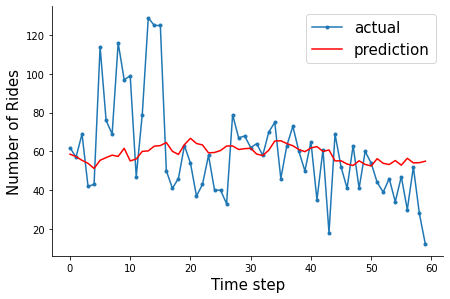

In [0]:
##plotting actual vs predicted
aa=[x for x in range(60)]
plt.plot(aa, Y_test[0][:60], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:60], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Number of Rides', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();
'''here it is visiable that in order to get the best forecast we have tp remove the outliers.
But for this project I am doing the primary work'''

#Prediction of number of ride requests for Telangana

Same kind of analysis done for this one also.So I am not commenting for the code

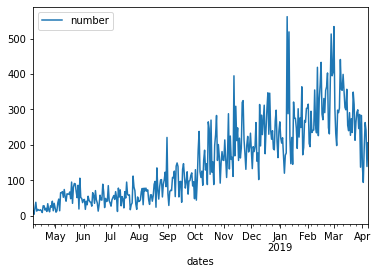

In [0]:
df2_c3.plot()

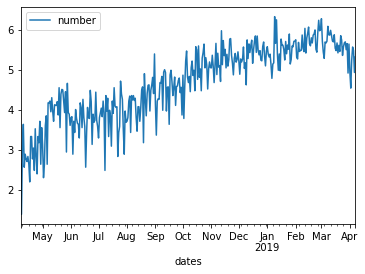

In [0]:
np.log(df2_c3).plot()

In [0]:
dataset = df2_c3.loc[:,'number'].values 
dataset = np.array(dataset).reshape(-1,1)
#dataset=np.log(dataset)
dataset = dataset.astype('float32')
print(dataset[0,0])
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 30
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

14.0


In [0]:
model = Sequential()
model.add(LSTM(30,return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(20))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=500, batch_size=32, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=True)

model.summary()

Epoch 1/500
8/8 [==============================] - 1s 76ms/step - loss: 0.0600 - val_loss: 0.2472
Epoch 2/500
8/8 [==============================] - 0s 7ms/step - loss: 0.0432 - val_loss: 0.1793
Epoch 3/500
8/8 [==============================] - 0s 7ms/step - loss: 0.0303 - val_loss: 0.1103
Epoch 4/500
8/8 [==============================] - 0s 7ms/step - loss: 0.0176 - val_loss: 0.0487
Epoch 5/500
8/8 [==============================] - 0s 7ms/step - loss: 0.0096 - val_loss: 0.0242
Epoch 6/500
8/8 [==============================] - 0s 7ms/step - loss: 0.0101 - val_loss: 0.0275
Epoch 7/500
8/8 [==============================] - 0s 7ms/step - loss: 0.0106 - val_loss: 0.0247
Epoch 8/500
8/8 [==============================] - 0s 7ms/step - loss: 0.0086 - val_loss: 0.0245
Epoch 9/500
8/8 [==============================] - 0s 7ms/step - loss: 0.0086 - val_loss: 0.0250
Epoch 10/500
8/8 [==============================] - 0s 7ms/step - loss: 0.0092 - val_loss: 0.0244
Epoch 11/500
8/8 [==========

In [0]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
#train_predict=originalvalue(train_predict)
Y_train = scaler.inverse_transform([Y_train])
#Y_train=originalvalue(Y_train)
test_predict = scaler.inverse_transform(test_predict)
#test_predict=originalvalue(test_predict)
Y_test = scaler.inverse_transform([Y_test])
#Y_test=originalvalue(Y_test)
#wmape=np.mean(np.abs((Y_test[0] -test_predict[:,0] ) /Y_test[0] )) * 100
wmape=(sum(np.abs(test_predict[:,0] - Y_test[0]))/sum(Y_test[0]))*100
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))
print(f'Forecasting Accuracy:{100-wmape}')

Train Mean Absolute Error: 33.34363667198568
Train Root Mean Squared Error: 45.684121067862414
Test Mean Absolute Error: 71.4090147102099
Test Root Mean Squared Error: 89.54419037525213
Forecasting Accuracy:75.93663679983868


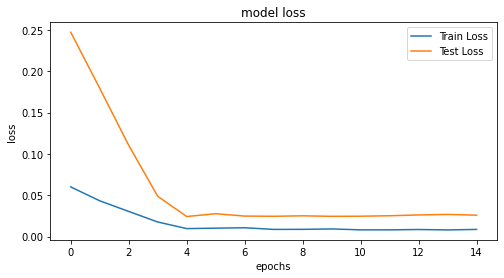

In [0]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();


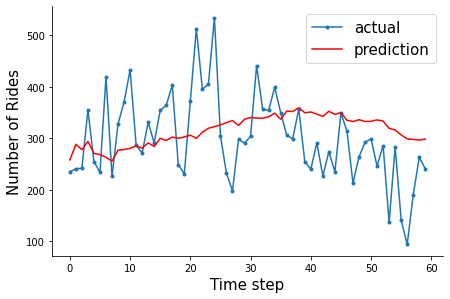

In [0]:
aa=[x for x in range(60)]
plt.plot(aa, Y_test[0][:60], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:60], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Number of Rides', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

# Prediction of number of rides for Jharkand

Here also the analysis is pretty same so I am not commenting for the coede.

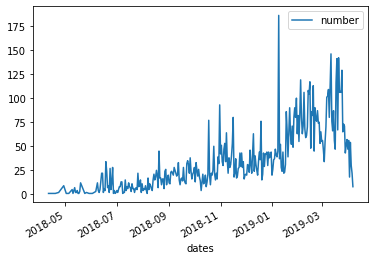

In [0]:
df2_c4.plot()

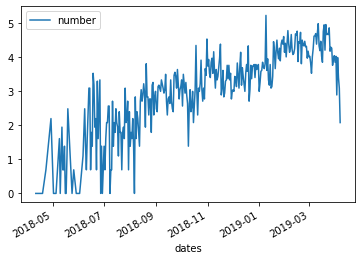

In [0]:
np.log(df2_c4).plot()

In [0]:
dataset = df2_c4.loc[:,'number'].values 
dataset = np.array(dataset).reshape(-1,1)
#dataset=np.log(dataset)
dataset = dataset.astype('float32')
print(dataset[0,0])
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 30
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

1.0


In [0]:
model = Sequential()
model.add(LSTM(30,return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(20))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=500, batch_size=32, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=True)

model.summary()

Epoch 1/500
7/7 [==============================] - 1s 86ms/step - loss: 0.0213 - val_loss: 0.1319
Epoch 2/500
7/7 [==============================] - 0s 8ms/step - loss: 0.0151 - val_loss: 0.0902
Epoch 3/500
7/7 [==============================] - 0s 7ms/step - loss: 0.0106 - val_loss: 0.0560
Epoch 4/500
7/7 [==============================] - 0s 7ms/step - loss: 0.0081 - val_loss: 0.0380
Epoch 5/500
7/7 [==============================] - 0s 8ms/step - loss: 0.0087 - val_loss: 0.0329
Epoch 6/500
7/7 [==============================] - 0s 7ms/step - loss: 0.0103 - val_loss: 0.0330
Epoch 7/500
7/7 [==============================] - 0s 7ms/step - loss: 0.0082 - val_loss: 0.0340
Epoch 8/500
7/7 [==============================] - 0s 7ms/step - loss: 0.0077 - val_loss: 0.0351
Epoch 9/500
7/7 [==============================] - 0s 9ms/step - loss: 0.0082 - val_loss: 0.0341
Epoch 10/500
7/7 [==============================] - 0s 8ms/step - loss: 0.0082 - val_loss: 0.0336
Epoch 11/500
7/7 [==========

In [0]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
#train_predict=originalvalue(train_predict)
Y_train = scaler.inverse_transform([Y_train])
#Y_train=originalvalue(Y_train)
test_predict = scaler.inverse_transform(test_predict)
#test_predict=originalvalue(test_predict)
Y_test = scaler.inverse_transform([Y_test])
#Y_test=originalvalue(Y_test)
#wmape=np.mean(np.abs((Y_test[0] -test_predict[:,0] ) /Y_test[0] )) * 100
wmape=(sum(np.abs(test_predict[:,0] - Y_test[0]))/sum(Y_test[0]))*100
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))
print(f'Forecasting Accuracy:{100-wmape}')

Train Mean Absolute Error: 9.23670278265545
Train Root Mean Squared Error: 15.72622642149347
Test Mean Absolute Error: 26.3566082783555
Test Root Mean Squared Error: 31.450463416488162
Forecasting Accuracy:65.42728874131623


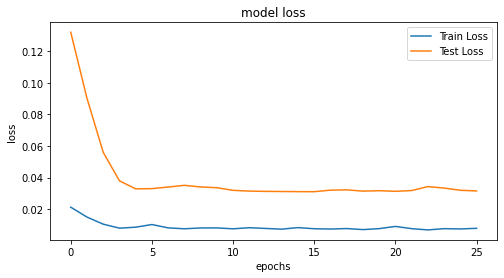

In [0]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();


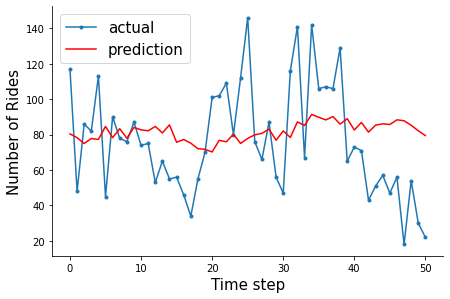

In [0]:
aa=[x for x in range(51)]
plt.plot(aa, Y_test[0][:51], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:51], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Number of Rides', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

Thanks & Regards,
Arindam Sarkar,
IIT BOMBAY,185280031,
Ph no:+91 7797703756,
LinkedIn:https://www.linkedin.com/in/arindam-s-77237a165/